<a href="https://colab.research.google.com/github/TheTharz/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

Load DataSet From The Drive

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/datasets/Churn_Modelling.csv')
print(dataset.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Creating dependent and independent features. Here dependent feature is exited. Whether or not customer will leave the bank. We have to predict that output from ann.

In [2]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

Create dummy variables. Dummy variables are created to convert categorical data into a numerical format that machine learning models can understand.

In [3]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

Concatanate the data frames

In [4]:
X=pd.concat([X,geography,gender],axis=1)

Drop unnecessery columns since dummy varaibles were created for the categorical features.

In [5]:
X=X.drop(['Geography','Gender'],axis=1)

Split the dataset in to train and test datasets.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature scaling.

Improves Model Convergence

Algorithms that rely on gradient descent (e.g., logistic regression, neural networks) perform faster and more accurately when features are scaled. Without scaling, large differences in feature magnitudes cause slow convergence or may prevent the model from finding the optimal solution.

Prevents Features from Dominating

Models that rely on distance measures (e.g., K-Nearest Neighbors, Support Vector Machines) are sensitive to feature magnitudes. If one feature has a much larger scale than others, it will dominate the model’s predictions.

Ensures Fair Weight Distribution

Linear models (e.g., linear regression, logistic regression) assign weights to features. Scaling ensures that the model treats all features equally and doesn’t assign disproportionate importance to features with larger magnitudes.

Improves Numerical Stability

Large or small feature values can lead to numerical instability and rounding errors in some algorithms.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating the ANN model

Importing the libraries

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Model

In [14]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7265 - loss: 0.5890 - val_accuracy: 0.7978 - val_loss: 0.5337
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7947 - loss: 0.5321 - val_accuracy: 0.7963 - val_loss: 0.5096
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7995 - loss: 0.5029 - val_accuracy: 0.7959 - val_loss: 0.4949
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7873 - loss: 0.4991 - val_accuracy: 0.7963 - val_loss: 0.4829
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7873 - loss: 0.4864 - val_accuracy: 0.7970 - val_loss: 0.4729
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7896 - loss: 0.4755 - val_accuracy: 0.7978 - val_loss: 0.4644
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7920 - loss: 0.4670 - val_accuracy: 0.7997 - val_loss: 0.4569
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7994 - loss: 0.4451 - val_acc

List history keys

In [15]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Summarize history for accuracy

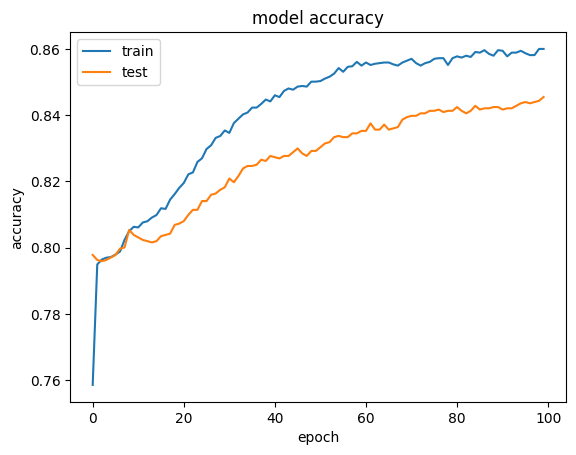

In [18]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Summarize the history for loss

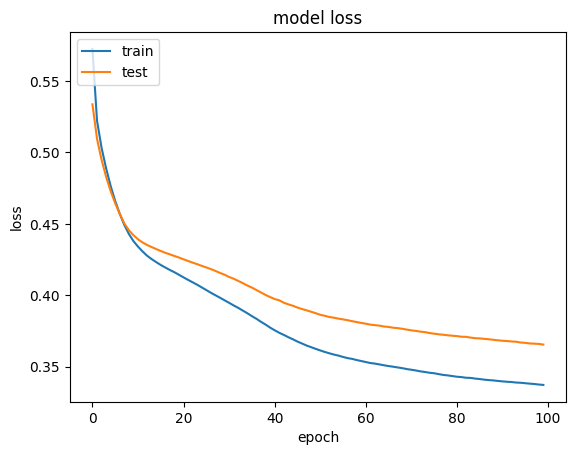

In [19]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Making predictions and evaluating the trained model

Predicting the test set results

In [20]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


Making the confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 212  193]]


Calculate the accuracy

In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8595
